# Amazon-Flex Data Science Techniques (Part III) - Juan Moctezuma

The following script creates a Logistic Regression. The data comes from the DISTANCES_ANALYSIS.csv which contains 2021 data from the RDF (Raw Data File) CSV file. 

The model is based on the following question, do routes or blocks that involve neighborhoods in which the first delivery address is LESS THAN 10 miles from the warehouse get MORE packages? Blocks (see dates) with a '1' represent shifts in which the warehouse-neighborhood's minimum approximate distance (WHS-NBHD_MIN-APPROX-DIST from the Raw Data File) is less than 10 miles. Those with '0' represent districts or delivery zones that are relatively far from the warehouse. 

No historical data (incomplete information compiled on year 2020; which exists prior to the creation of this project) is included for this model.   

...

## 1. Distance Analysis

The first step is to install the required libraries.

In [ ]:
#!pip install numpy

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install pandas

In [ ]:
#!pip install sklearn

In [ ]:
#!pip install seaborn

In [ ]:
#!pip install scipy

In [ ]:
#!pip install pylab

Then import the libraries that you installed.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from scipy.special import expit
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Once the distance data csv is placed on the correct folder, you may use pandas to read the file and create dataframe. A common practice is to print the data from your csv to make sure everything is loaded correctly.

In [2]:
data = pd.read_csv("Data/DISTANCES_ANALYSIS.csv")
data['DATE'] = pd.to_datetime(data['DATE'], infer_datetime_format = True)

df = pd.DataFrame(data, columns= ['DATE','WHS-NBHD_MIN-APPROX-DIST','TOTAL_PKGS','DIST_LESS_THAN_TEN'])
df.dtypes

DATE                        datetime64[ns]
WHS-NBHD_MIN-APPROX-DIST           float64
TOTAL_PKGS                           int64
DIST_LESS_THAN_TEN                   int64
dtype: object

A common practice is to print the data from your csv to make sure everything is loaded correctly. On the 'DIST_LESS_THAN_TEN'column, '1' stands for TRUE and '0' for FALSE. All distances in this project are measured with miles.

In [3]:
print(df)

        DATE  WHS-NBHD_MIN-APPROX-DIST  TOTAL_PKGS  DIST_LESS_THAN_TEN
0 2021-01-02                       4.5          54                   1
1 2021-01-08                      13.7          38                   0
2 2021-01-15                       7.6          33                   1
3 2021-01-22                       8.7          40                   1
4 2021-01-29                      13.0          30                   0
5 2021-02-05                       8.5          39                   1
6 2021-02-12                       9.3          31                   1
7 2021-02-13                       6.0          46                   1
8 2021-02-19                      13.0          26                   0
9 2021-02-26                       9.3          28                   1


The following script generates the original (binary) distance analysis (scatter plot). Why binary? As mentioned on the introduction, green points with a y-value of 1 are those routes that their first delivery address(es) are 'relatively' close to the warehouse (starting point) or less than 10 miles away. 

Green points with a y-value of zero represent places that are far away from the warehouse. Data gets updated on a weekly basis.

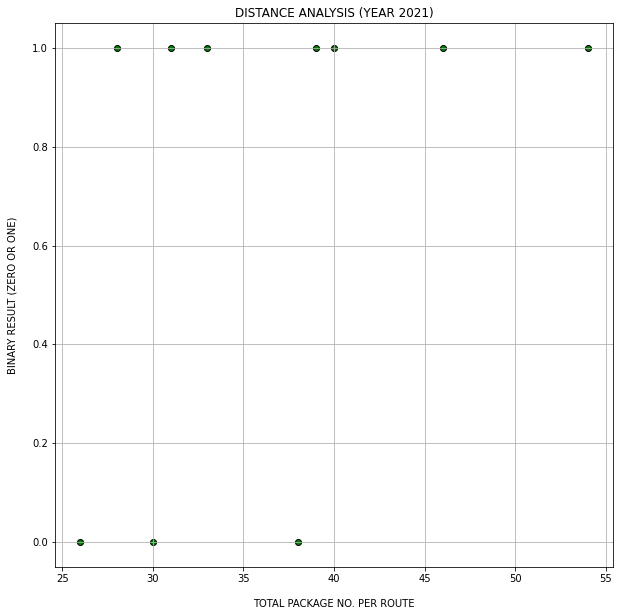

In [4]:
fig, ax = plt.subplots()

X = data['TOTAL_PKGS']
y = data['DIST_LESS_THAN_TEN']
plt.scatter(X, y, color = 'green', edgecolor = 'black', linewidth = 1, marker = 'o')

plt.title('DISTANCE ANALYSIS (YEAR 2021)')
plt.xlabel("TOTAL PACKAGE NO. PER ROUTE", labelpad = 15)
plt.ylabel("BINARY RESULT (ZERO OR ONE)", labelpad = 15)
plt.grid()
plt.gcf().set_size_inches((10, 10))
plt.show()

## 2. Logistic Regression

To train our model we now declare 'X' by iterating numerical data from the distances CSV, and we declare 'y' by iterating the binary results. 

In [5]:
X = df.iloc[:,[1,2]].values
y = df.iloc[:,3].values

In [6]:
#print(X)
#print(y)

The following functions that are used to set up the model come from sklearn module.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred=classifier.predict(X_test)

Accuracy score is expected to be low because the dataset is quite small yet. We'll see how the scores change as more data gets compiled! 

In [11]:
accuracy_score(y_test, y_pred)*100

33.33333333333333

We now plot our model! The LogisticRegression and fit function come from the sklearn module. 

In [12]:
X = data['TOTAL_PKGS']
y = data['DIST_LESS_THAN_TEN']

The dimension of the array needs to get re-shaped.

In [13]:
X = np.array(X).reshape(-1,1)

In [14]:
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X, y)

LogisticRegression(C=100000.0)

The linspace function is used to set up an interval.

In [15]:
x_test = np.linspace(10,55,100)

Predict dummy y_test data based on the logistic model.

In [16]:
y_test = x_test * model.coef_ + model.intercept_
sigmoid = expit(y_test)

We use a scatter plot and we fit in the logistic regression within it.

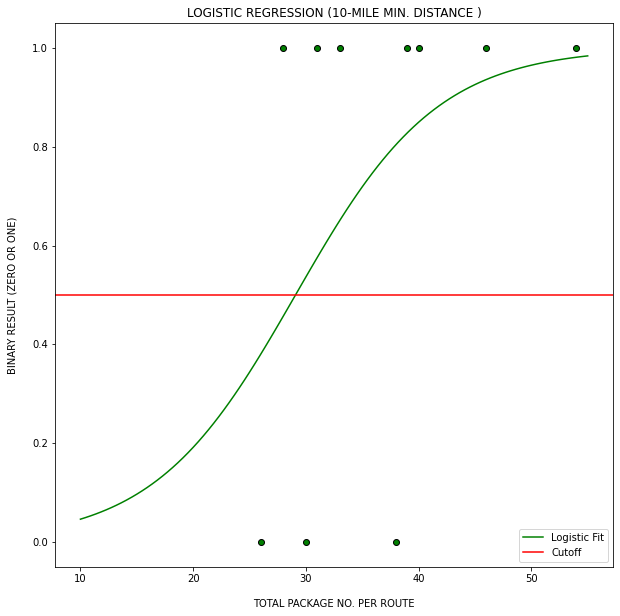

In [17]:
plt.scatter(X, y, color = 'green', edgecolor = 'black', linewidth = 1, marker = 'o')
plt.plot(x_test,sigmoid.ravel(),c="green", label = "Logistic Fit")
plt.axhline(.5, color="red", label="Cutoff")
plt.legend(loc="lower right")

# ravel to convert the 2-d array to a flat array
plt.title('LOGISTIC REGRESSION (10-MILE MIN. DISTANCE )')
plt.xlabel("TOTAL PACKAGE NO. PER ROUTE", labelpad = 15)
plt.ylabel("BINARY RESULT (ZERO OR ONE)", labelpad = 15)
plt.gcf().set_size_inches((10, 10))
plt.show()

## 3. Conclusion

In [ ]:
# The logistic regression model supports the idea that Amazon’s algorithms assign a larger random number of packages 
# to contractors when block routes take place in areas that are relatively close to the warehouse (point of origin). 
# Therefore, it is statistically more likely for Amazon partners to get less packages for routes that are distant 
# from the warehouse.

In [ ]:
# The original question that allowed the application of this machine learning technique was: Do routes or blocks that 
# involve neighborhoods in which the first delivery address is LESS THAN 10 miles from the Amazon warehouse get MORE 
# packages?

In [ ]:
# The appearance of this model might change as the dataset gets larger. Anyhow, as the total package number increases,
# the logistic fit or green line (see previous slide) converges to ‘1’. Recall that ‘1’ represents routes that are 
# categorized as those that have a ‘min. distance that is less than 10 miles.’